In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../input/cbdcdc/Train.csv')
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 8].values

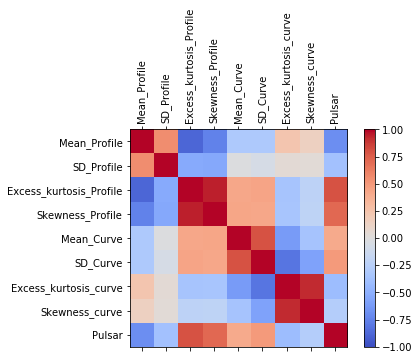

In [2]:
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

This Correlation graph suggests that Excess_kurtosis_Profile has hightest positive correlation with pulsar prediction.
While the highest negative correlation for the prediction of a pulsar is given by the Mean_Profile parameter.
The order from highest positive to highest negative is as follows: Excess_kurtoisis_Profile>Skewness_Profile>SD_Curve>Mean_Curve>Skewness_curve>SD_Profile~Skewness_curve>Excess_kurtoisis_curve>Mean_Profile.

From the above correlation insight I recognize that Excess_kurtoisis_Profile, Skewness_Profile, SD_Curve, Mean_Curve, Skewness_curve are more significant than other variables so I choose only these 4 features to train model.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


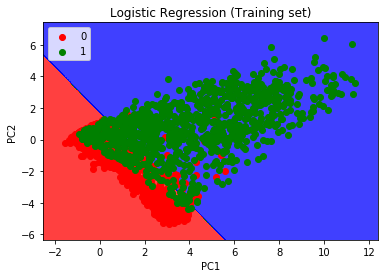

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



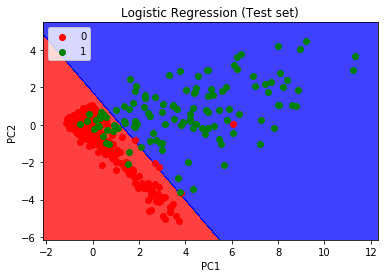

In [4]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [6]:
# K-Nearest Neighbors (K-NN)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred3 = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)



In [7]:
cm3

array([[1122,   10],
       [  10,  111]])

In [8]:
def f1(cm):
    p=cm[1][1]/(cm[1][0]+cm[1][1])
    r=cm[1][1]/(cm[1][1]+cm[0][1])
    f1=2*p*r/(p+r)
    return f1

In [9]:
f1(cm3)

0.9173553719008265

In [10]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(X_train, y_train)

y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

In [11]:
f1(cm1)


0.9012875536480687

In [12]:
from xgboost import XGBClassifier
classifier2 = XGBClassifier()
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)

In [13]:
f1(cm2)

0.923728813559322

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 4))

classifier.add(Dense(output_dim = 12,init = 'uniform', activation = 'relu' ))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 24, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 48, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 25)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=24, kernel_initializer="uniform")`
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=48, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dens

Epoch 1/25
11275/11275 [==============================] - 6s 541us/step - loss: 0.1285 - acc: 0.9682
Epoch 2/25
11275/11275 [==============================] - 5s 424us/step - loss: 0.0736 - acc: 0.9788
Epoch 3/25
11275/11275 [==============================] - 5s 426us/step - loss: 0.0716 - acc: 0.9793
Epoch 4/25
11275/11275 [==============================] - 5s 427us/step - loss: 0.0712 - acc: 0.9792
Epoch 5/25
11275/11275 [==============================] - 5s 427us/step - loss: 0.0699 - acc: 0.9799
Epoch 6/25
11275/11275 [==============================] - 5s 423us/step - loss: 0.0703 - acc: 0.9804
Epoch 7/25
11275/11275 [==============================] - 5s 435us/step - loss: 0.0693 - acc: 0.9805
Epoch 8/25
11275/11275 [==============================] - 5s 450us/step - loss: 0.0689 - acc: 0.9799
Epoch 9/25
11275/11275 [==============================] - 5s 434us/step - loss: 0.0688 - acc: 0.9805
Epoch 10/25
11275/11275 [==============================] - 5s 422us/step - loss: 0.0689 - a

In [15]:
f1(cm)

0.8974358974358975

From the above models XGBoost Classifier performed best. Therefore, I choose to classify the test data on the same.

In [16]:
s=pd.Series()

In [17]:
dd=pd.read_csv('../input/cbdcdc/Test.csv')
x1=dd.iloc[:,2:6].values
y1=classifier2.predict(x1)

In [18]:
type(y1)

numpy.ndarray

In [19]:
for i,j in enumerate(y1):
    s=s.set_value(i,j)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [20]:
d=pd.DataFrame()

In [21]:
d['Predictions']=s

In [23]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(d)
